In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.cluster.hierarchy import dendrogram, linkage

#### Drug-Gene Relationship Analysis 

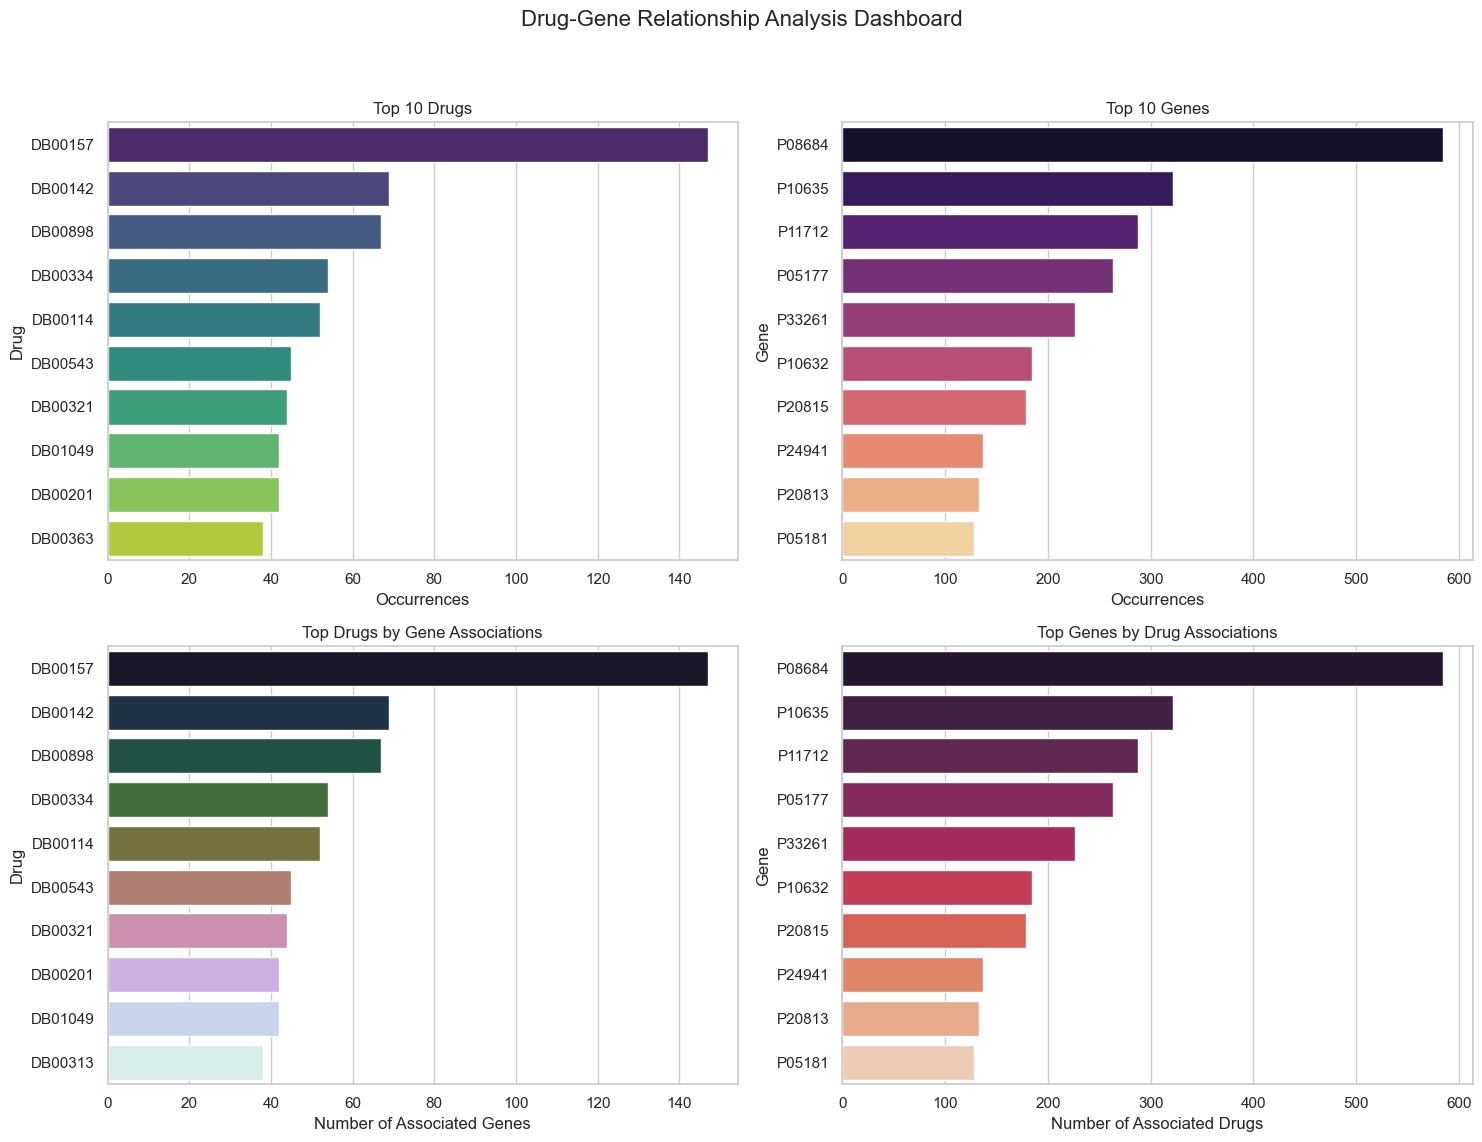

In [10]:
# Load the file
file_path = 'Gene_Drug_Interaction.txt'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t')

# Basic Statistics
unique_drugs = data['#Drug'].nunique()
unique_genes = data['Gene'].nunique()

# Top Drugs and Genes
top_drugs = data['#Drug'].value_counts().head(10)
top_genes = data['Gene'].value_counts().head(10)

# Relationships Analysis
drug_gene_counts = data.groupby('#Drug').size().sort_values(ascending=False).head(10)
gene_drug_counts = data.groupby('Gene').size().sort_values(ascending=False).head(10)

# Visualization
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Drug-Gene Relationship Analysis Dashboard', fontsize=16)

# Top Drugs Bar Chart
sns.barplot(ax=axes[0, 0], x=top_drugs.values, y=top_drugs.index, palette="viridis")
axes[0, 0].set_title('Top 10 Drugs')
axes[0, 0].set_xlabel('Occurrences')
axes[0, 0].set_ylabel('Drug')

# Top Genes Bar Chart
sns.barplot(ax=axes[0, 1], x=top_genes.values, y=top_genes.index, palette="magma")
axes[0, 1].set_title('Top 10 Genes')
axes[0, 1].set_xlabel('Occurrences')
axes[0, 1].set_ylabel('Gene')

# Drug-Gene Relationship for Top Drugs
sns.barplot(ax=axes[1, 0], x=drug_gene_counts.values, y=drug_gene_counts.index, palette="cubehelix")
axes[1, 0].set_title('Top Drugs by Gene Associations')
axes[1, 0].set_xlabel('Number of Associated Genes')
axes[1, 0].set_ylabel('Drug')

# Gene-Drug Relationship for Top Genes
sns.barplot(ax=axes[1, 1], x=gene_drug_counts.values, y=gene_drug_counts.index, palette="rocket")
axes[1, 1].set_title('Top Genes by Drug Associations')
axes[1, 1].set_xlabel('Number of Associated Drugs')
axes[1, 1].set_ylabel('Gene')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the layout
plt.show()


#### Centrality Measure

In [11]:
# Create a network graph
G = nx.from_pandas_edgelist(data, '#Drug', 'Gene')

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Convert the degree centrality to a DataFrame for better visualization
degree_centrality_df = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Sort the DataFrame based on centrality
degree_centrality_df_sorted = degree_centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)

# Display the top 10 nodes by degree centrality
print(degree_centrality_df_sorted.head(10))


        Node  Degree Centrality
36    P08684           0.079542
17    P10635           0.043857
124   P11712           0.039226
122   P05177           0.035821
44    P33261           0.030782
34    P10632           0.025197
164   P20815           0.024380
315  DB00157           0.020022
9     P24941           0.018660
278   P20813           0.018115


#### Network Graph

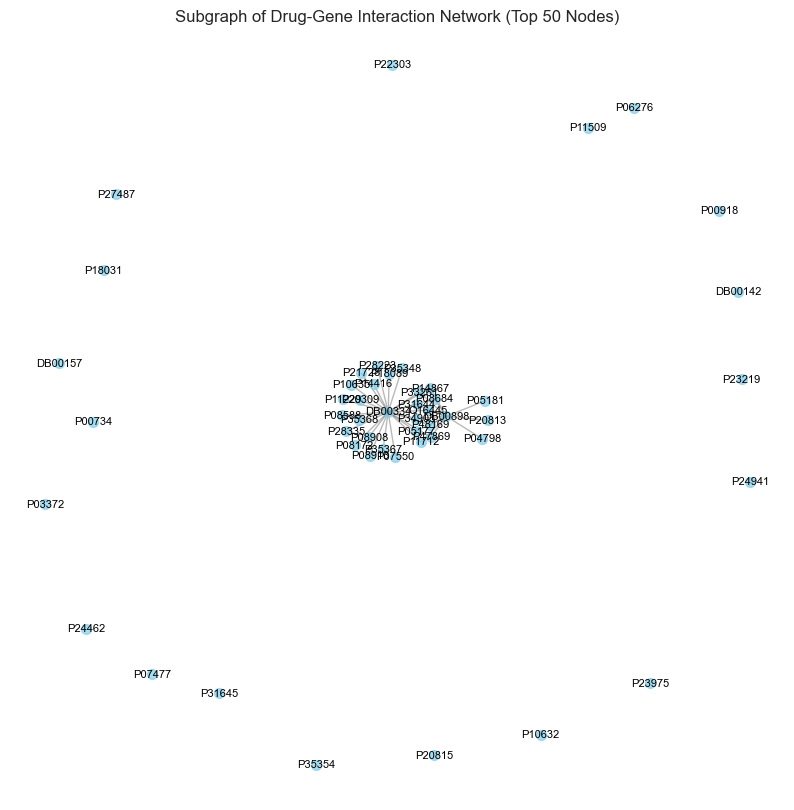

In [12]:
# Create a network graph
G = nx.from_pandas_edgelist(data, '#Drug', 'Gene')
degree_centrality = nx.degree_centrality(G)
degree_centrality_df = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])
degree_centrality_df_sorted = degree_centrality_df.sort_values(by='Degree Centrality', ascending=False)

# Selecting a subset of the network
top_50_nodes = degree_centrality_df_sorted.head(50)['Node'].tolist()
G_sub = G.subgraph(top_50_nodes)

# Drawing the subgraph
plt.figure(figsize=(10, 10))
pos_sub = nx.spring_layout(G_sub, seed=42)  # Positioning of nodes in the subgraph
nx.draw_networkx_nodes(G_sub, pos_sub, node_color='skyblue', alpha=0.7, node_size=50)
nx.draw_networkx_edges(G_sub, pos_sub, alpha=0.3)
nx.draw_networkx_labels(G_sub, pos_sub, font_size=8, font_color='black')

plt.title("Subgraph of Drug-Gene Interaction Network (Top 50 Nodes)")
plt.axis('off')
plt.show()


#### Distribution Analysis

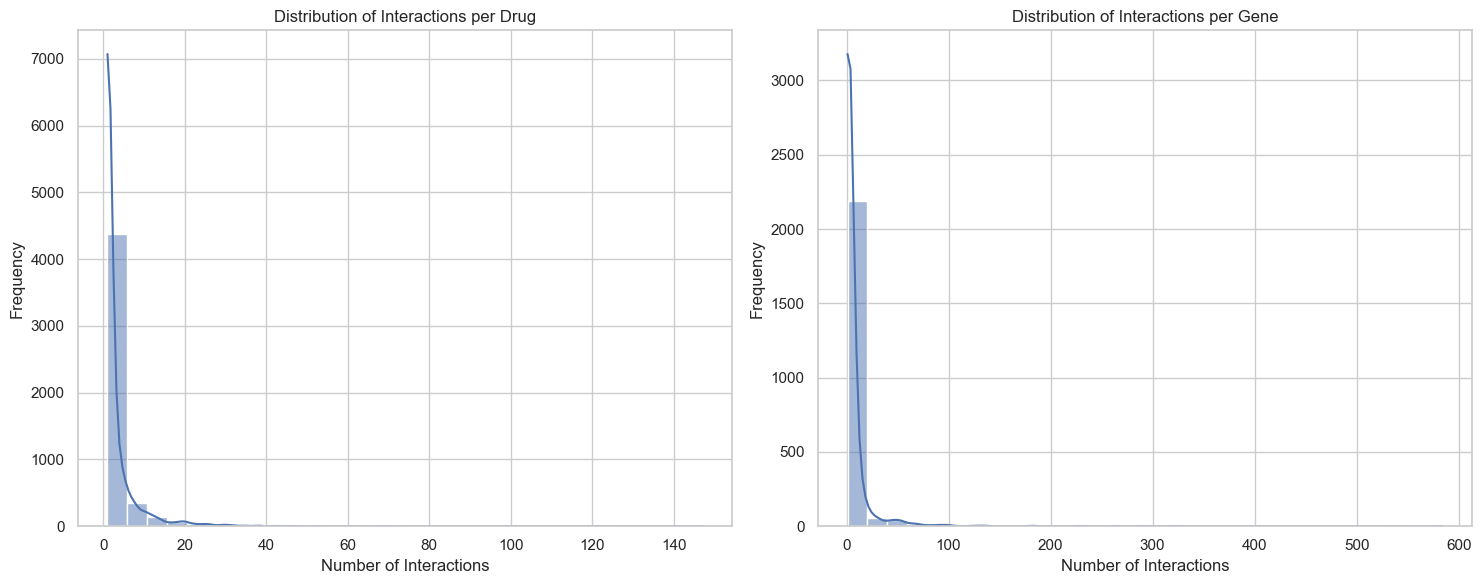

Drug Interaction Statistics:
 count    5018.000000
mean        3.016939
std         5.178796
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       147.000000
dtype: float64

Gene Interaction Statistics:
 count    2325.000000
mean        6.511398
std        21.109082
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       584.000000
dtype: float64


In [13]:
# Distribution Analysis - Counting the number of interactions per drug and per gene
drug_interaction_counts = data.groupby('#Drug').size()
gene_interaction_counts = data.groupby('Gene').size()

# Plotting the distributions
plt.figure(figsize=(15, 6))

# Distribution of interactions per drug
plt.subplot(1, 2, 1)
sns.histplot(drug_interaction_counts, bins=30, kde=True)
plt.title('Distribution of Interactions per Drug')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')

# Distribution of interactions per gene
plt.subplot(1, 2, 2)
sns.histplot(gene_interaction_counts, bins=30, kde=True)
plt.title('Distribution of Interactions per Gene')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Descriptive statistics for the distributions
drug_interaction_stats = drug_interaction_counts.describe()
gene_interaction_stats = gene_interaction_counts.describe()

# Print the descriptive statistics
print("Drug Interaction Statistics:\n", drug_interaction_stats)
print("\nGene Interaction Statistics:\n", gene_interaction_stats)


Drug Interaction Descriptive Statistics:
 count    5018.000000
mean        3.016939
std         5.178796
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       147.000000
dtype: float64

Gene Interaction Descriptive Statistics:
 count    2325.000000
mean        6.511398
std        21.109082
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       584.000000
dtype: float64


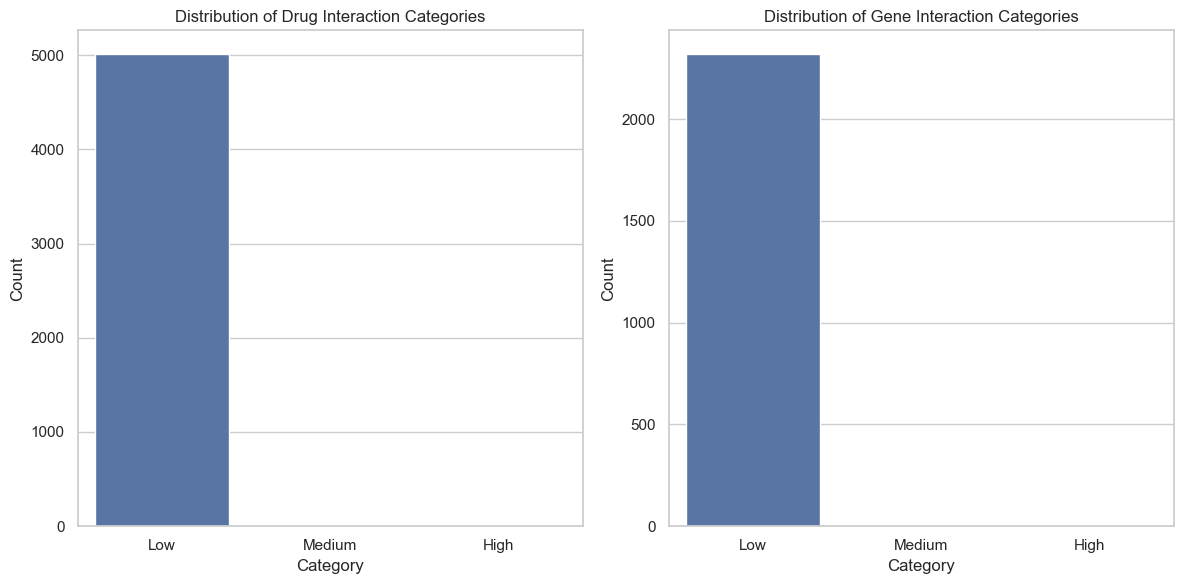

In [14]:
# Counting the number of interactions per drug and per gene
drug_interaction_counts = data.groupby('#Drug').size()
gene_interaction_counts = data.groupby('Gene').size()

# Descriptive statistics
drug_descriptive_stats = drug_interaction_counts.describe()
gene_descriptive_stats = gene_interaction_counts.describe()

# Print the descriptive statistics
print("Drug Interaction Descriptive Statistics:\n", drug_descriptive_stats)
print("\nGene Interaction Descriptive Statistics:\n", gene_descriptive_stats)

# Categorizing into low, medium, high
drug_categories = pd.cut(drug_interaction_counts, bins=3, labels=["Low", "Medium", "High"])
gene_categories = pd.cut(gene_interaction_counts, bins=3, labels=["Low", "Medium", "High"])

# Plotting the distribution of categories
plt.figure(figsize=(12, 6))

# Distribution of drug categories
plt.subplot(1, 2, 1)
sns.countplot(x=drug_categories)
plt.title('Distribution of Drug Interaction Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Distribution of gene categories
plt.subplot(1, 2, 2)
sns.countplot(x=gene_categories)
plt.title('Distribution of Gene Interaction Categories')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Hierarchical CLustering and PCA

In [18]:
# Create a binary interaction matrix
interaction_matrix = pd.pivot_table(data, index='#Drug', columns='Gene', fill_value=0, aggfunc=lambda x: 1)

# If you want to work with a smaller sample for computational reasons
sampled_interaction_matrix = interaction_matrix.sample(n=50, axis=0, random_state=42).sample(n=50, axis=1, random_state=42)


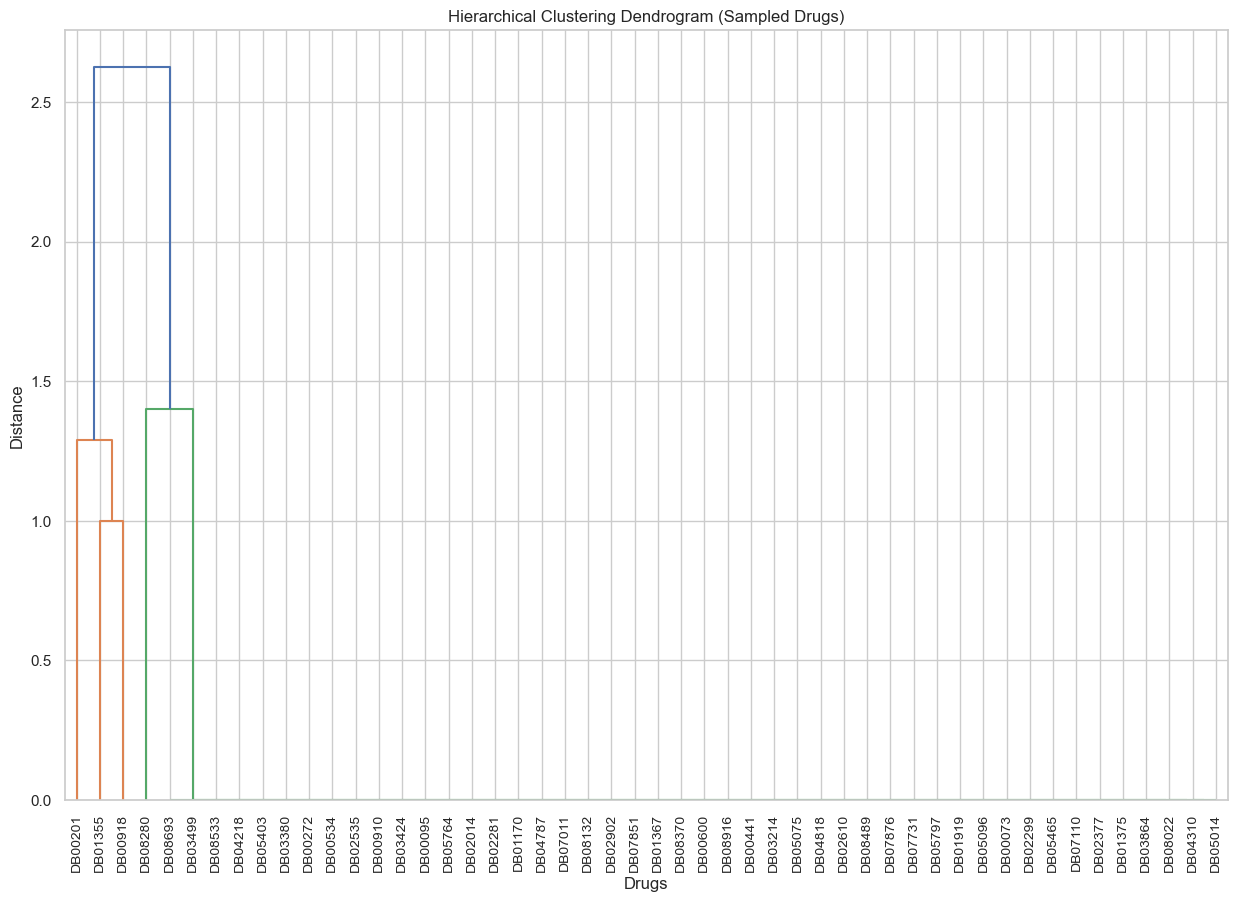

In [19]:
# Assuming 'sampled_interaction_matrix' is your sampled data matrix
linked_sampled = linkage(sampled_interaction_matrix, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked_sampled, labels=sampled_interaction_matrix.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Sampled Drugs)')
plt.xlabel('Drugs')
plt.ylabel('Distance')
plt.show()

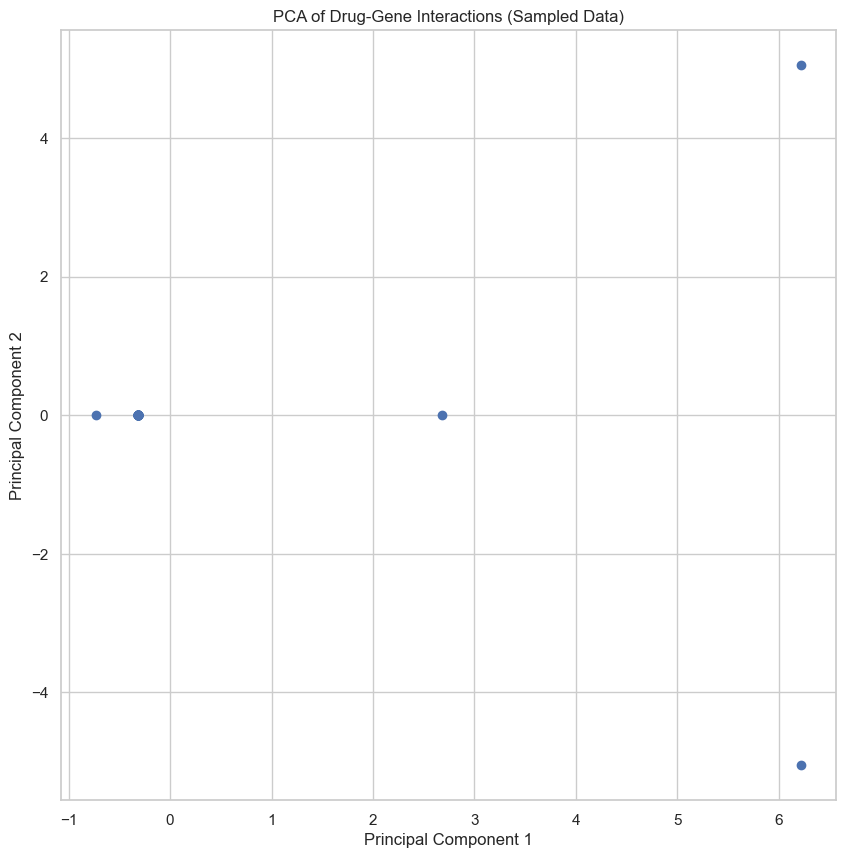

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Standardize the data
scaler = StandardScaler()
sampled_interaction_matrix_std = scaler.fit_transform(sampled_interaction_matrix)


# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sampled_interaction_matrix_std)

# Plotting the PCA results
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Drug-Gene Interactions (Sampled Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()